In [1]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Función que realiza la Interpolación por diferencias divididas de los puntos (xi,fx).
#Código hecho por el ayudante y adaptada por nosotros.
#Encuentra el polinomio de interpolación.
def inter_dif_div(xi,fx):


    x = sp.Symbol('x')



    M = []

    for i in range (0, len(xi)):
        M.append([])

        M[i].append(xi[i])

        M[i].append(fx[i])



    cont = 0

    for j in range (2, len(xi)+1):
        cont += 1
        for i in range (0, len(xi)-cont):
            try:
                M[i].append( (M[i+1][j-1]- M[i][j-1])/ (M[i + cont][0] - M[i][0]) )
            except ZeroDivisionError:
                return -100000000*x

    P2 = M[0][1]
    for j in range (2, len(xi)+1):
        c = 1
        for i in range (0, j-1):
             c = c * (x - xi[i])
        P2 = P2 + M[0][j]*c


    return P2

In [20]:
#Función que evalua el polinomio P en xx.
#xx debe ser un array. Por ejemplo: eval_pol(P,[1,5,-2]).
def eval_pol(P,xx):
    x = sp.Symbol('x')
    fx = []
    for xi in xx:
        fx.append(P.evalf(subs = {x:xi}))
    return fx

In [19]:
#Función que calcula todos los posibles polinomios interpolantes lineales de los datos (x,y) tomando solamente 2 puntos de 
#ellos y que entrega el polinomio que minimiza el Error Cuadrático Medio entre los los valores reales y los valores predichos.
def elige_polinomio(x,y):
    
    mejor_error = 10**100
    Ind = np.arange(len(x)) 
    n = len(x)
    for x1 in range(0,n):
        for x2 in range(x1+1,n):
            ind = [x1,x2]
            xx_ind  = [(x[i]) for i in ind]
            yy_ind  = [(y[i]) for i in ind]
            P = inter_dif_div(xx_ind,yy_ind)
            Px = eval_pol(P,x)
            error_act = sum((np.array(y)-np.array(Px))**2)

            if error_act < mejor_error:
                mejor_error = error_act
                P_def = P
                Ind_def = ind
    print(f'Años escogidos para la mejor interpolación : {Ind_def[0]+2010} y {Ind_def[1]+2010}')            
                
    return P_def

In [4]:
#Ustedes después ingresan los datos faltantes
data = pd.DataFrame({
    'Año':         np.arange(2010,2021),
    'Población':   [17064000,17254000,15758929,17612000,17788000,17971000,18167000,18419000,18751000,19107000,19678363],
    'Natalidad':   [249134,250183,225352,246568,243695,240811,236171,233921,232512,233105,236140],
    'Mortalidad':  [96087,97951,99914,101885,104024,106334,108875,111914,115562,102364,109624],
    'Inmigrantes': [375388,378990,390000,391200,505999,639724,588974,488571,501233,939992,978882]
})
data

,Año,Población,Natalidad,Mortalidad,Inmigrantes
0,2010,17064000,249134,96087,375388
1,2011,17254000,250183,97951,378990
2,2012,15758929,225352,99914,390000
3,2013,17612000,246568,101885,391200
4,2014,17788000,243695,104024,505999
5,2015,17971000,240811,106334,639724
6,2016,18167000,236171,108875,588974
7,2017,18419000,233921,111914,488571
8,2018,18751000,232512,115562,501233
9,2019,19107000,233105,102364,939992


In [6]:
#Datos en formato lista
Year = data['Año'].tolist()
Nat  = data['Natalidad'].tolist()
Mor  = data['Mortalidad'].tolist()
Inm  = data['Inmigrantes'].tolist()
Pob  = data['Población'].tolist()

## Población

Años escogidos para la mejor interpolación : 2015 y 2019


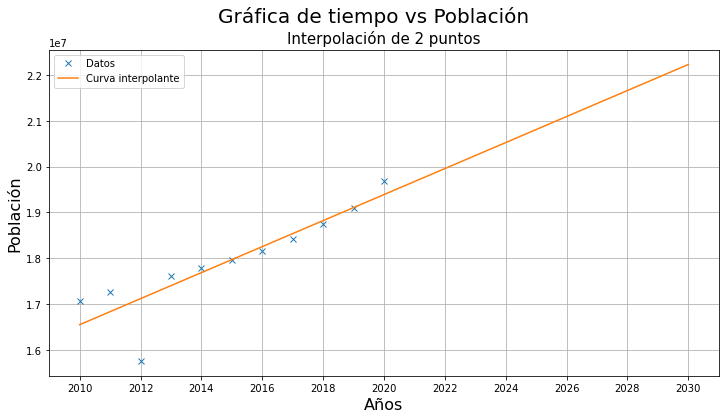

In [7]:
P_Pob = elige_polinomio(Year,Pob)
plt.figure( figsize = (12,6))
tt   = np.linspace(2010,2030)
P_tt = eval_pol(P_Pob,tt)
plt.plot(Year,Pob,'x')
plt.plot(tt,P_tt)
plt.title('Interpolación de 2 puntos',fontsize=15)
plt.suptitle('Gráfica de tiempo vs Población',fontsize=20)
plt.legend(['Datos','Curva interpolante'])
plt.grid()
plt.xticks(np.arange(2010,2031,2))
plt.xlabel('Años',fontsize=16)
plt.ylabel('Población',fontsize=16)
plt.show()

In [21]:
P_Pob

284000.0*x - 554289000.0

## Natalidad

Años escogidos para la mejor interpolación : 2016 y 2018


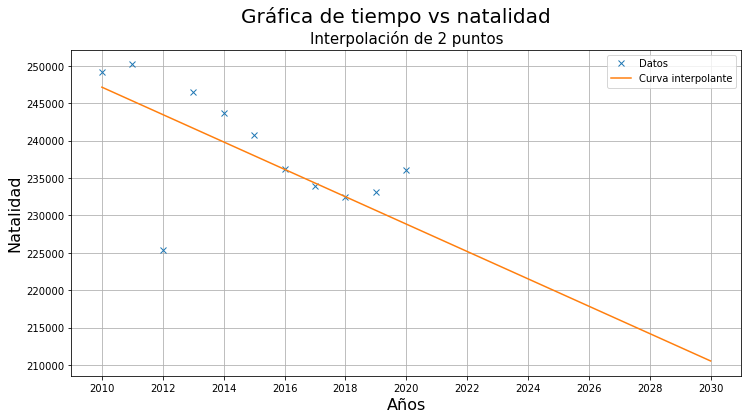

In [8]:
P_Nat = elige_polinomio(Year,Nat)
plt.figure( figsize = (12,6))
tt   = np.linspace(2010,2030)
P_tt = eval_pol(P_Nat,tt)
plt.plot(Year,Nat,'x')
plt.plot(tt,P_tt)
plt.title('Interpolación de 2 puntos',fontsize=15)
plt.suptitle('Gráfica de tiempo vs natalidad',fontsize=20)
plt.legend(['Datos','Curva interpolante'])
plt.grid()
plt.xticks(np.arange(2010,2031,2))
plt.xlabel('Años',fontsize=16)
plt.ylabel('Natalidad',fontsize=16)
plt.show()

In [22]:
P_Nat

3924443.0 - 1829.5*x

## Mortalidad

Años escogidos para la mejor interpolación : 2013 y 2020


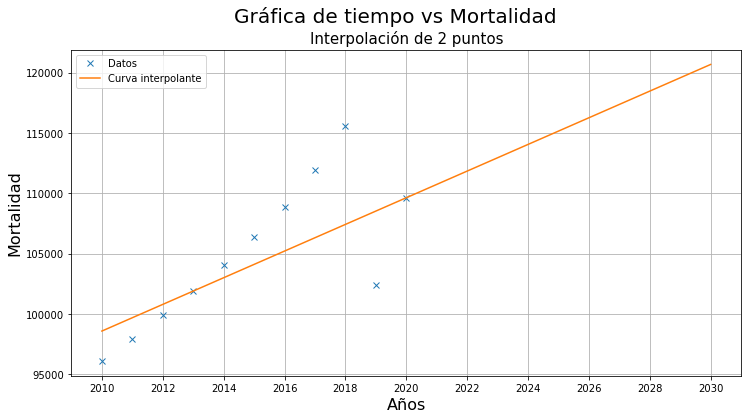

In [9]:
P_Mor = elige_polinomio(Year,Mor)
plt.figure( figsize = (12,6))
tt   = np.linspace(2010,2030)
P_tt = eval_pol(P_Mor,tt)
plt.plot(Year,Mor,'x')
plt.plot(tt,P_tt)
plt.title('Interpolación de 2 puntos',fontsize=15)
plt.suptitle('Gráfica de tiempo vs Mortalidad',fontsize=20)
plt.legend(['Datos','Curva interpolante'])
plt.grid()
plt.xticks(np.arange(2010,2031,2))
plt.xlabel('Años',fontsize=16)
plt.ylabel('Mortalidad',fontsize=16)
plt.show()

In [24]:
P_Mor

1105.57142857143*x - 2123630.28571429

## Inmigrantes

Años escogidos para la mejor interpolación : 2012 y 2014


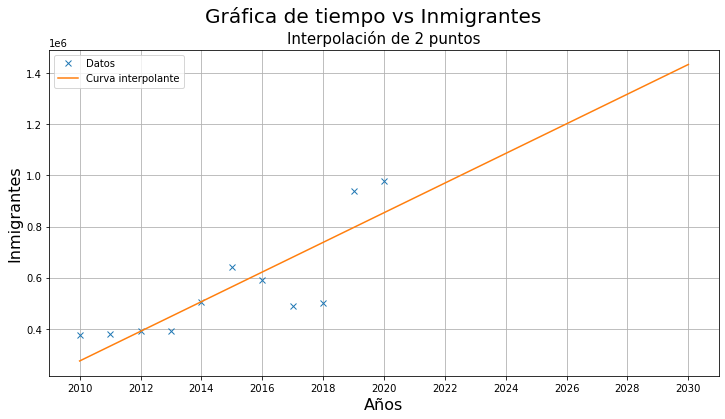

In [10]:
P_Inm = elige_polinomio(Year,Inm)
plt.figure( figsize = (12,6))
tt   = np.linspace(2010,2030)
P_tt = eval_pol(P_Inm,tt)
plt.plot(Year,Inm,'x')
plt.plot(tt,P_tt)
plt.title('Interpolación de 2 puntos',fontsize=15)
plt.suptitle('Gráfica de tiempo vs Inmigrantes',fontsize=20)
plt.legend(['Datos','Curva interpolante'])
plt.grid()
plt.xticks(np.arange(2010,2031,2))
plt.xlabel('Años',fontsize=16)
plt.ylabel('Inmigrantes',fontsize=16)
plt.show()

In [26]:
P_Inm

57999.5*x - 116304994.0

## Población, Natalidad, Mortalidad e Inmigrantes en el año 2030

In [11]:
print(f'Población: {round(eval_pol(P_Pob,[2030])[0])}')
print(f'Natalidad: {round(eval_pol(P_Nat,[2030])[0])}')
print(f'Mortalidad: {round(eval_pol(P_Mor,[2030])[0])}')
print(f'Inmigrantes: {round(eval_pol(P_Inm,[2030])[0])}')

Población: 22231000
Natalidad: 210558
Mortalidad: 120680
Inmigrantes: 1433991
